<a href="https://colab.research.google.com/github/DeepLearningSaeid/Grad/blob/main/Chapter_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
# This code installs the Autokeras library and imports the required libraries.
#  Autokeras is an open-source library that uses Bayesian optimization and reinforcement learning to optimize machine learning models. 
#  The timeit library is used to measure the execution time of code snippets. The numpy library is used for scientific computing with Python. 
#  The train_test_split function from sklearn.model_selection is used to split the dataset into training and test sets. 
#  The matplotlib library is used for data visualization. 
#  The Model, Sequential, Input, Embedding, Dense, concatenate, Dropout, Flatten, and Activation classes from the keras.layers module 
#  are used to define the architecture of a neural network. The backend module from keras is used to access the functions from the backend (e.g., TensorFlow). 
#  The get_custom_objects function from keras.utils.generic_utils is used to register custom objects for serialization and deserialization. 
#  The np_utils, to_categorical, and plot_model functions from keras.utils 
#  are used for data preprocessing, creating a categorical representation of data, and visualizing the model architecture. 
#  The random seed is set to 110 to ensure reproducibility of results.

# Install Autokeras library
!pip install autokeras

# Import required libraries
import autokeras as ak
import timeit
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from keras.models import Model, Sequential
from keras.layers import Input, Embedding, Dense, concatenate, Dropout, Flatten, Activation
from keras import backend as K
from keras.utils.generic_utils import get_custom_objects
from keras.utils import np_utils, to_categorical, plot_model

# Set random seed
np.random.seed(110)


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.4/162.4 KB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.7/135.7 KB 19.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 70.6 MB/s eta 0:00:00


In [66]:
# This code defines a number of custom activation functions that can be used in a Keras model. 
# The get_custom_objects function is used to retrieve a dictionary mapping names to custom objects (such as functions),
# and the update function is used to add the custom activation functions to this dictionary.

# Here is a brief description of each function:

#     x_1: This function raises the input to the power of 1, which is equivalent to returning the input as is.
#     x_2: This function returns the square of the input divided by 2.
#     x_2_: This function returns the square of the input divided by 24.
#     x_2__: This function returns the square of the input divided by 720.
#     x_2___: This function returns the square of the input divided by 40320.

# After these functions are defined, they can be used as activation functions in a Keras model 
# by using the names 'X_1', 'X_2', 'X_2_', 'X_2__', and 'X_2___', respectively. 
# For example, to use the x_2 function as an activation, you would use Dense(hidden_dimention, activation='X_2').

#Define custom activation functions

def x_1(x):
# """Returns x^1"""
  return K.pow(x, 1)
  
# Register x_1 as a custom activation function
get_custom_objects().update({'X_1': Activation(x_1)})

def x_2(x):
# """Returns (x^2)/2"""
  return (K.pow(x, 2)) / 2

# Register x_2 as a custom activation function
get_custom_objects().update({'X_2': Activation(x_2)})

def x_2_(x):
# """Returns (x^2)/24"""
  return (K.pow(x, 2)) / 24

# Register x_2_ as a custom activation function
get_custom_objects().update({'X_2_': Activation(x_2_)})

def x_2__(x):
# """Returns (x^2)/720"""
  return (K.pow(x, 2)) / 720

# Register x_2__ as a custom activation function
get_custom_objects().update({'X_2__': Activation(x_2__)})

def x_2___(x):
# """Returns (x^2)/40320"""
  return (K.pow(x, 2)) / 40320

# Register x_2___ as a custom activation function
get_custom_objects().update({'X_2___': Activation(x_2___)})

In [13]:
# This code defines a number of functions that can be used for testing purposes. Here is a brief description of each function:

#     power_: This function raises the input to the power of a specified number.
#     sigmoid_array: This function applies the sigmoid function element-wise to the input array.
#     exp_: This function applies the exponential function element-wise to the input array.
#     log_: This function applies the natural logarithm element-wise to the input array.
#     generate_random: This function generates a 2D array of random numbers between 0.01 and 0.99.
#     fun_1: This function returns a combination of the square of the input and the sigmoid of the input.
#     fun_2: This function returns a combination of the fifth power of the input, the sigmoid of the input, the exponential of the input, and the natural 
#      logarithm of the input.
#     fun_3: This function returns a combination of the 20th power of the input, the sigmoid of the input, the exponential of the input, 
#      and the natural logarithm of the input.


def power_(x, n):
    return np.power(x, n)

def sigmoid_array(x):
    return 1 / (1 + np.exp(-x))

def exp_(x):
    return np.exp(x)

def log_(x):
    return np.log(x)

def generate_random(shape_1, shape_2):
    temp = np.random.random(shape_1 * shape_2)
    temp = np.random.uniform(low=0.01, high=0.99, size=(shape_1 * shape_2))
    temp1 = temp.reshape(shape_1, shape_2)
    return temp1

def fun_1(x):
    return 1 / 2 * power_(x, 2) - 5 * sigmoid_array(x)

def fun_2(x):
    return 6 * power_(x, 5) - 3 * sigmoid_array(x) + exp_(x) - 9 * log_(x)

def fun_3(x):
    return 22 * power_(x, 20) + sigmoid_array(x) + 2 * exp_(x) + 5 * log_(x)


In [56]:
# This code defines a function plot_loss that creates a single plot with six subplots.
#  Each subplot visualizes the training and test loss for a particular model architecture over the number of epochs.
#  The function takes in the following arguments:

#     size: The maximum value for the y-axis of all subplots.
#     in_1, in_2, ..., in_6: The History objects for the six model architectures.
#     title: The title for each subplot.

# The function first defines a helper function plot_subplot that takes in a subplot number, a History object, and a title,
# and creates a single subplot with the training and test loss for that model architecture. 
# The plot_loss function then calls plot_subplot for each of the six model architectures.

def plot_loss(size, in_1, in_2, in_3, in_4, in_5, in_6):
    # Set font size for all subplots
    plt.rcParams.update({'font.size': 16})
    
    def plot_subplot(subplot_num, history, title):
        # Extract training and test loss from history object
        training_loss = history.history['loss']
        test_loss = history.history['val_loss']
        
        # Create list of epochs
        epoch_count = range(1, len(training_loss) + 1)
        
        # Create subplot and plot training and test loss
        plt.subplot(subplot_num)
        plt.plot(epoch_count, training_loss, 'r--')
        plt.plot(epoch_count, test_loss, 'b-')
        
        # Add legend and labels
        plt.legend(['Training Loss', 'Test Loss'])
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        
        # Set y-axis limit
        plt.ylim(0, size)
        
        # Add title to subplot
        plt.title(title)
    
    # Create figure with 6 subplots
    plt.figure(figsize=(20, 10))
    
    # Plot training and test loss for each model architecture
    plot_subplot(231, in_1, 'Architecture 1')
    plot_subplot(232, in_2, 'Architecture 2')
    plot_subplot(233, in_3, 'Architecture 3')
    plot_subplot(234, in_4, 'Architecture 4')
    plot_subplot(235, in_5, 'Architecture 5')
    plot_subplot(236, in_6, 'Architecture 6')


In [67]:
# This function plots the shapes of the input test functions on six subplots. 
# It takes six inputs, each of which is an array containing three arrays. 
# The first array of each input contains the input values of the test function,
#  the second array contains the output values of the test function, 
#  and the third array contains the predicted output values of the test function. 
#  The subplots are arranged in a 2x3 grid and the shapes of the test functions are plotted on each subplot using the scatter function. 
#  The title function is used to label each subplot with the name of the architecture being plotted. 
#  The subplots_adjust function is used to adjust the spacing between subplots. Finally, the show function is used to display the plots.


def plot_shape(in_1,in_2,in_3,in_4,in_5,in_6):
    # Set up the plot with a figure size of (20,10)
    plt.figure(figsize=(20,10))
    # Update the font size of the plot to 16
    plt.rcParams.update({'font.size': 16})

    # Plot the first subplot with the input data
    plt.subplot(231)
    plt.scatter(in_1[0], in_1[1])
    plt.scatter(in_1[0], in_1[2])
    plt.title('Architure 1')

    # Plot the second subplot with the input data
    plt.subplot(232)
    plt.scatter(in_2[0], in_2[1])
    plt.scatter(in_2[0], in_2[2])
    plt.title('Architure 2')

    # Plot the third subplot with the input data
    plt.subplot(233)
    plt.scatter(in_3[0], in_3[1])
    plt.scatter(in_3[0], in_3[2])
    plt.title('Architure 3')

    # Plot the fourth subplot with the input data
    plt.subplot(234)
    plt.scatter(in_4[0], in_4[1])
    plt.scatter(in_4[0], in_4[2])
    plt.title('Architure 4')
    
    # Plot the fifth subplot with the input data
    plt.subplot(235)
    plt.scatter(in_5[0], in_5[1])
    plt.scatter(in_5[0], in_5[2])
    plt.title('Architure 5')    
    
    # Plot the sixth subplot with the input data
    plt.subplot(236)
    plt.scatter(in_6[0], in_6[1])
    plt.scatter(in_6[0], in_6[2])
    plt.title('Our Architure')

    # Adjust the subplot layout
    plt.subplots_adjust(top=0.92, bottom=0.08, left=0.0010, right=0.95, hspace=0.3, wspace=0.18)

    # Show the plot
    plt.show()


In [68]:
# The function plot_ takes a Keras model's training history as input and plots the training loss and test loss over the number of epochs.
#  It uses matplotlib to create the plot and displays it to the user. 
#  The x-axis represents the epoch count, the y-axis represents the loss value, and the training loss is plotted in red with a dashed line and 
#  the test loss is plotted in blue with a solid line. The legend labels the two curves as "Training Loss" and "Test Loss",
#   and the x-axis and y-axis are labeled as "Epoch" and "Loss" respectively. The plot is then displayed to the user using the show function.
def plot_(history):
    # Retrieve the training and test loss values
    training_loss = history.history['loss']
    test_loss = history.history['val_loss']

    # Generate epoch count
    epoch_count = range(1, len(training_loss) + 1)

    # Plot the training and test loss
    plt.plot(epoch_count, training_loss, 'r--')
    plt.plot(epoch_count, test_loss, 'b-')
    plt.legend(['Training Loss', 'Test Loss'])
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.show()


In [59]:
def visualize_result(history,X_test, Y_test,model):
  plot_(history)
  plt.scatter(X_test, Y_test)
  predict=model.predict(X_test)
  plt.scatter(X_test, predict)

In [60]:
#Creates dataset
dim_train=1000
dim_test=200

X=generate_random(dim_train,3)
Y=generate_random(dim_train,3)
    
Y[:,0]=fun_1(X[:,0])
Y[:,1]=fun_2(X[:,1])
Y[:,2]=fun_3(X[:,2])
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=1234)

def data_prep(x_train,x_test,y_train,y_test,column):
  X_train=x_train[:,column]
  Y_train=y_train[:,column]
  X_test=x_test[:,column]
  Y_test=y_test[:,column]
  return X_train,Y_train,X_test,Y_test

In [61]:
#Hyper perameters
number_epo=50
input_dim=1
output_dim=1

In [62]:
hidden_dimention = 50

# Model definition
model = Sequential()
in_ = Input(shape=(input_dim,))

# First set of layers
layer_1_x_1 = Dense(hidden_dimention, activation='X_1')(in_)
layer_1_x_2 = Dense(hidden_dimention, activation='X_2')(in_)
concatenate_first_layer = concatenate([layer_1_x_1, layer_1_x_2])

# Second set of layers
layer_x_3_x_4 = Dense(hidden_dimention, activation='X_2_')(concatenate_first_layer)
layer_x_5_x_6 = Dense(hidden_dimention, activation='X_2__')(layer_x_3_x_4)
layer_x_7_x_8 = Dense(hidden_dimention, activation='X_2___')(layer_x_5_x_6)

# Concatenate the two sets of layers
concatenate_second_layer = concatenate([layer_1_x_1, layer_1_x_2, concatenate_first_layer,
                                        layer_x_3_x_4, layer_x_5_x_6, layer_x_7_x_8])

# Output layer
out_put_first_layer = Dense(hidden_dimention, activation='linear')(concatenate_second_layer)
out_put = Dense(output_dim, activation='linear')(out_put_first_layer)

# Create model
Our_model = Model(in_ , out_put)
Our_model.compile(loss='mean_squared_error', optimizer='adam')


Run Time : 7.748805
7/7 [==============================] - 0s 2ms/step


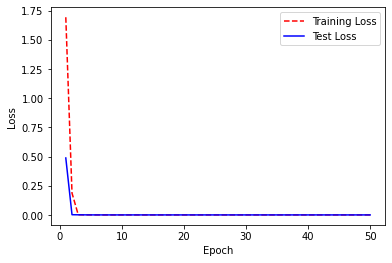

7/7 [==============================] - 0s 1ms/step


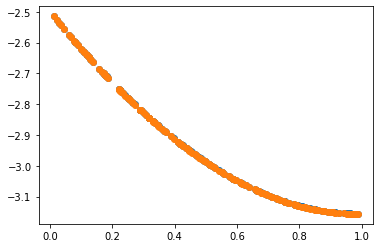

In [63]:
# Preprocess data
column = 0
X_train, Y_train, X_test, Y_test = data_prep(x_train, x_test, y_train, y_test, column)

# Reshape data
X_train = X_train.reshape(800, 1)
Y_train = Y_train.reshape(800, 1)
X_test = X_test.reshape(200, 1)
Y_test = Y_test.reshape(200, 1)

# Train model
start = timeit.default_timer()
history = Our_model.fit(X_train, Y_train, epochs=number_epo, verbose=0, batch_size=10,
                        validation_data=(X_test, Y_test))
end = timeit.default_timer()
print("Run Time : %f" % (end - start))

# Make predictions and visualize results
predict = Our_model.predict(X_test)
visualize_result(history, X_test, Y_test, Our_model)
F_1_our_model = [X_test, Y_test, predict, history]


Run Time : 10.271638
7/7 [==============================] - 0s 2ms/step


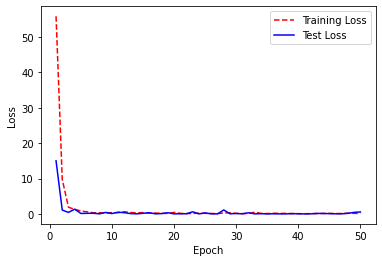

7/7 [==============================] - 0s 2ms/step


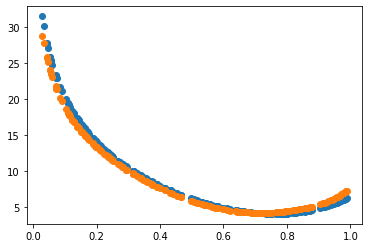

In [45]:
# Preprocess data
column = 1
X_train, Y_train, X_test, Y_test = data_prep(x_train, x_test, y_train, y_test, column)

# Reshape data
X_train = X_train.reshape(800, 1)
Y_train = Y_train.reshape(800, 1)
X_test = X_test.reshape(200, 1)
Y_test = Y_test.reshape(200, 1)

# Train model
start = timeit.default_timer()
history = Our_model.fit(X_train, Y_train, epochs=number_epo, verbose=0, batch_size=10,
                        validation_data=(X_test, Y_test))
end = timeit.default_timer()
print("Run Time : %f" % (end - start))

# Make predictions and visualize results
predict = Our_model.predict(X_test)
visualize_result(history, X_test, Y_test, Our_model)
F_1_our_model = [X_test, Y_test, predict, history]


Run Time : 10.284103
7/7 [==============================] - 0s 1ms/step


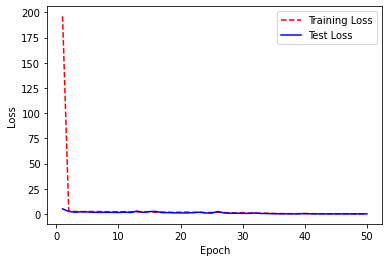

7/7 [==============================] - 0s 1ms/step


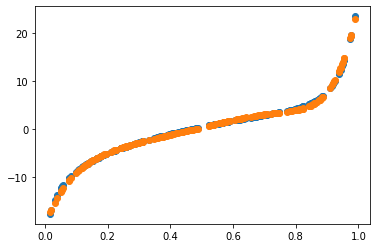

In [46]:
# Preprocess data
column = 2
X_train, Y_train, X_test, Y_test = data_prep(x_train, x_test, y_train, y_test, column)

# Reshape data
X_train = X_train.reshape(800, 1)
Y_train = Y_train.reshape(800, 1)
X_test = X_test.reshape(200, 1)
Y_test = Y_test.reshape(200, 1)

# Train model
start = timeit.default_timer()
history = Our_model.fit(X_train, Y_train, epochs=number_epo, verbose=0, batch_size=10,
                        validation_data=(X_test, Y_test))
end = timeit.default_timer()
print("Run Time : %f" % (end - start))

# Make predictions and visualize results
predict = Our_model.predict(X_test)
visualize_result(history, X_test, Y_test, Our_model)
F_1_our_model = [X_test, Y_test, predict, history]


In [20]:
#First Standard Archetecture
model = Sequential()
model.add(Dense(10, input_dim=input_dim, activation='relu'))
model.add(Dense(20, activation='sigmoid'))
model.add(Dense(30, activation='tanh'))
model.add(Dense(20, activation='relu'))
model.add(Dense(15, activation='sigmoid'))
model.add(Dense(25, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(output_dim, activation='tanh'))
model.add(Dropout(0.2))
#model.summary()
model.compile(loss='mean_squared_error', optimizer='adam')

Run Time : 10.295865


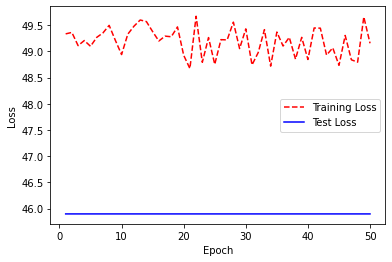

16/16 [==============================] - 0s 1ms/step


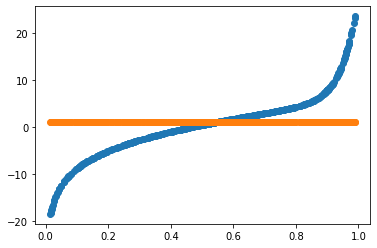

In [24]:
#train traditional model for Function 3
column=2
X_train,Y_train,X_test,Y_test= data_prep(x_train,x_test,y_train,y_test,column)

# F_3_archicture_1_


start = timeit.default_timer()
history = model.fit(X_train,Y_train,epochs=number_epo,verbose=0,batch_size=10,validation_data=(X_test, Y_test)) 
end = timeit.default_timer()
print("Run Time : %f" % (end-start))
plot_(history)
plt.scatter(X_test, Y_test)
predict=model.predict(X_test)
plt.scatter(X_test, predict)

F_3_archicture_1=[X_test,Y_test,predict,history,]

Run Time : 7.489075


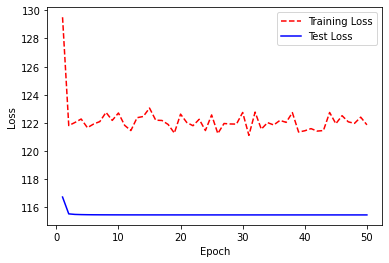

16/16 [==============================] - 0s 1ms/step


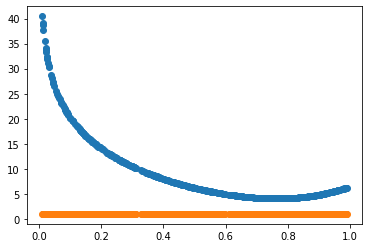

In [23]:
#Train model for Funtcion 2 
column=1
X_train,Y_train,X_test,Y_test= data_prep(x_train,x_test,y_train,y_test,column)


#F_2_archicture_1

start = timeit.default_timer()
history = model.fit(X_train,Y_train,epochs=number_epo,verbose=0,batch_size=10,validation_data=(X_test, Y_test)) 
end = timeit.default_timer()
print("Run Time : %f" % (end-start))
plot_(history)
plt.scatter(X_test, Y_test)
predict=model.predict(X_test)
plt.scatter(X_test, predict)


F_2_archicture_1=[X_test,Y_test,predict,history]

Run Time : 7.635655


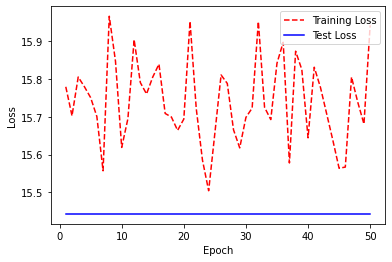

7/7 [==============================] - 0s 1ms/step


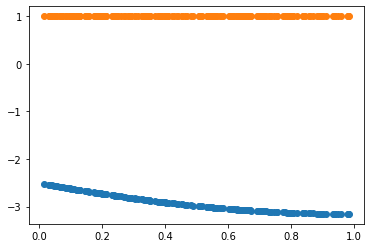

In [ ]:
#Train Model for function 1
column=0
X_train=X_train_temp[:,column]
Y_train=Y_train_temp[:,column]
X_test=X_test_temp[:,column]
Y_test=Y_test_temp[:,column]

#F_1_archicture_1

start = timeit.default_timer()
history = model.fit(X_train,Y_train,epochs=number_epo,verbose=0,batch_size=10,validation_data=(X_test, Y_test)) 
end = timeit.default_timer()
print("Run Time : %f" % (end-start))
plot_(history)
plt.scatter(X_test, Y_test)
predict=model.predict(X_test)
plt.scatter(X_test, predict)

F_1_archicture_1=[X_test,Y_test,predict,history]

In [ ]:
#Second Traditional model for Function 3
model = Sequential()
model.add(Dense(5, input_dim=input_dim, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(50, activation='tanh'))
model.add(Dense(18, activation='relu'))
model.add(Dense(15, activation='tanh'))
model.add(Dense(18, activation='sigmoid'))
model.add(Dropout(0.2))
model.add(Dense(8, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(output_dim, activation='relu'))
#model.summary()
model.compile(loss='mean_squared_error', optimizer='adam')

Run Time : 10.661450


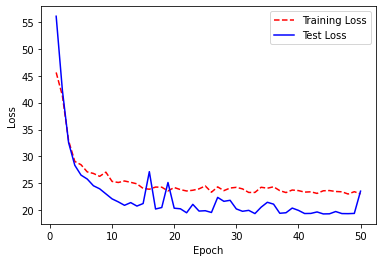

7/7 [==============================] - 0s 2ms/step


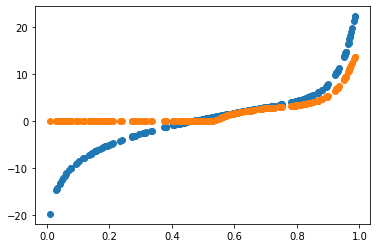

In [ ]:
#Train MOdel for Function 3
archicture_2=[]
column=2
X_train=X_train_temp[:,column]
Y_train=Y_train_temp[:,column]
X_test=X_test_temp[:,column]
Y_test=Y_test_temp[:,column]


#F_3_archicture_2


start = timeit.default_timer()
history = model.fit(X_train,Y_train,epochs=number_epo,verbose=0,batch_size=10,validation_data=(X_test, Y_test)) 
end = timeit.default_timer()
print("Run Time : %f" % (end-start))
plot_(history)
plt.scatter(X_test, Y_test)
predict=model.predict(X_test)
plt.scatter(X_test, predict)

F_3_archicture_2=[X_test,Y_test,predict,history]


Run Time : 7.514053


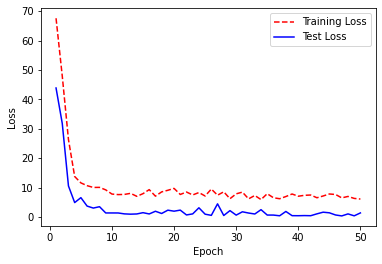

7/7 [==============================] - 0s 1ms/step


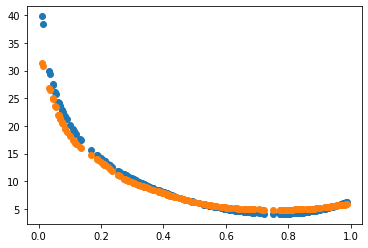

In [ ]:
#Train MOdel for Function 2
column=1
X_train=X_train_temp[:,column]
Y_train=Y_train_temp[:,column]
X_test=X_test_temp[:,column]
Y_test=Y_test_temp[:,column]


#F_2_archicture_2


start = timeit.default_timer()
history = model.fit(X_train,Y_train,epochs=number_epo,verbose=0,batch_size=10,validation_data=(X_test, Y_test)) 
end = timeit.default_timer()
print("Run Time : %f" % (end-start))
plot_(history)
plt.scatter(X_test, Y_test)
predict=model.predict(X_test)
plt.scatter(X_test, predict)
F_2_archicture_2=[X_test,Y_test,predict,history]


Run Time : 8.347588


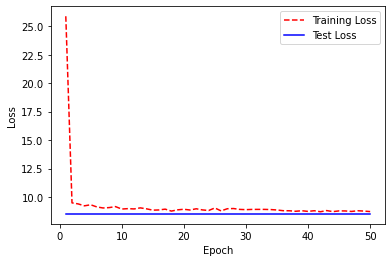

7/7 [==============================] - 0s 1ms/step


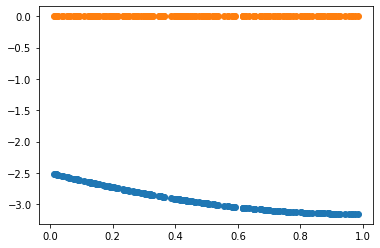

In [ ]:
#Train MOdel for Function 1
column=0
X_train=X_train_temp[:,column]
Y_train=Y_train_temp[:,column]
X_test=X_test_temp[:,column]
Y_test=Y_test_temp[:,column]


#F_1_archicture_2


start = timeit.default_timer()
history = model.fit(X_train,Y_train,epochs=number_epo,verbose=0,batch_size=10,validation_data=(X_test, Y_test)) 
end = timeit.default_timer()
print("Run Time : %f" % (end-start))
plot_(history)
plt.scatter(X_test, Y_test)
predict=model.predict(X_test)
plt.scatter(X_test, predict)

F_1_archicture_2=[X_test,Y_test,predict,history]


In [ ]:
#Third Traditional Model 
model = Sequential()
model.add(Dense(5, input_dim=input_dim, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(20, activation='tanh'))
model.add(Dense(15, activation='relu'))
model.add(Dense(25, activation='tanh'))
model.add(Dense(20, activation='sigmoid'))
model.add(Dense(25, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(8, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(output_dim, activation='relu'))
model.summary()
model.compile(loss='mean_squared_error', optimizer='adam')

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_48 (Dense)            (None, 5)                 10        
                                                                 
 dense_49 (Dense)            (None, 10)                60        
                                                                 
 dense_50 (Dense)            (None, 20)                220       
                                                                 
 dense_51 (Dense)            (None, 15)                315       
                                                                 
 dense_52 (Dense)            (None, 25)                400       
                                                                 
 dense_53 (Dense)            (None, 20)                520       
                                                                 
 dense_54 (Dense)            (None, 25)               

Run Time : 8.970616


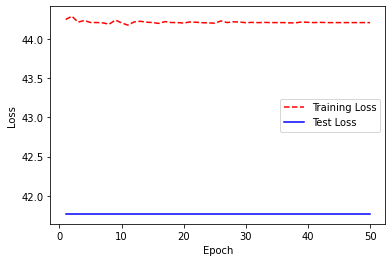

7/7 [==============================] - 0s 1ms/step


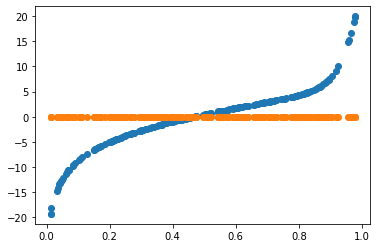

In [ ]:
#Train Model for Function 3
column=2
X_train=X_train_temp[:,column]
Y_train=Y_train_temp[:,column]
X_test=X_test_temp[:,column]
Y_test=Y_test_temp[:,column]


#F_3_archicture_3

start = timeit.default_timer()
history = model.fit(X_train,Y_train,epochs=number_epo,verbose=0,batch_size=10,validation_data=(X_test, Y_test)) 
end = timeit.default_timer()
print("Run Time : %f" % (end-start))
plot_(history)
plt.scatter(X_test, Y_test)
predict=model.predict(X_test)
plt.scatter(X_test, predict)

F_3_archicture_3=[X_test,Y_test,predict,history]


Run Time : 8.204696


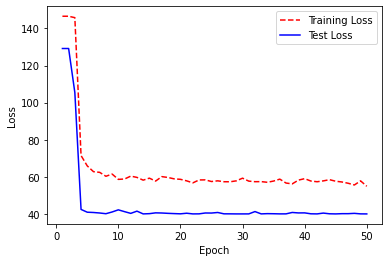

7/7 [==============================] - 0s 2ms/step


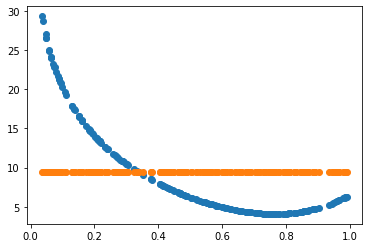

In [ ]:
#Train Model for Function 2
column=1
X_train=X_train_temp[:,column]
Y_train=Y_train_temp[:,column]
X_test=X_test_temp[:,column]
Y_test=Y_test_temp[:,column]


#F_2_archicture_3

start = timeit.default_timer()
history = model.fit(X_train,Y_train,epochs=number_epo,verbose=0,batch_size=10,validation_data=(X_test, Y_test)) 
end = timeit.default_timer()
print("Run Time : %f" % (end-start))
plot_(history)
plt.scatter(X_test, Y_test)
predict=model.predict(X_test)
plt.scatter(X_test, predict)
F_2_archicture_3=[X_test,Y_test,predict,history]


Run Time : 8.174504


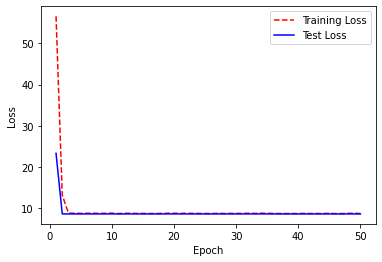

7/7 [==============================] - 0s 2ms/step


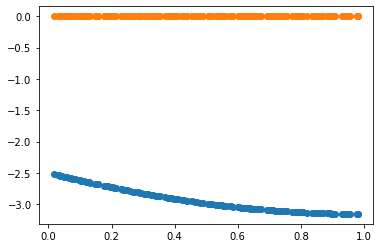

In [ ]:
#Train Model for Function 1
column=0
X_train=X_train_temp[:,column]
Y_train=Y_train_temp[:,column]
X_test=X_test_temp[:,column]
Y_test=Y_test_temp[:,column]


#F_1_archicture_3

start = timeit.default_timer()
history = model.fit(X_train,Y_train,epochs=number_epo,verbose=0,batch_size=10,validation_data=(X_test, Y_test)) 
end = timeit.default_timer()
print("Run Time : %f" % (end-start))
plot_(history)
plt.scatter(X_test, Y_test)
predict=model.predict(X_test)
plt.scatter(X_test, predict)


F_1_archicture_3=[X_test,Y_test,predict,history]


In [ ]:
#Fourth Traditional Model
model = Sequential()
model.add(Dense(40, input_dim=input_dim, activation='relu'))
model.add(Dense(25, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(output_dim, activation='relu'))
model.add(Dropout(0.2))
#model.summary()
model.compile(loss='mean_squared_error', optimizer='adam')

Run Time : 10.537769


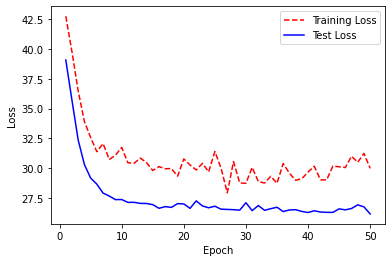

7/7 [==============================] - 0s 2ms/step


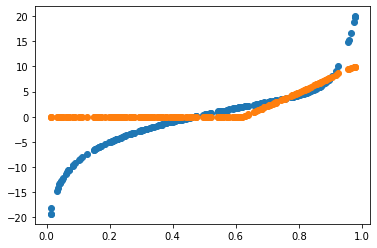

In [ ]:
#Train Model for Function 3
column=2
X_train=X_train_temp[:,column]
Y_train=Y_train_temp[:,column]
X_test=X_test_temp[:,column]
Y_test=Y_test_temp[:,column]


#F_3_archicture_4

start = timeit.default_timer()
history = model.fit(X_train,Y_train,epochs=number_epo,verbose=0,batch_size=10,validation_data=(X_test, Y_test)) 
end = timeit.default_timer()
print("Run Time : %f" % (end-start))
plot_(history)
plt.scatter(X_test, Y_test)
predict=model.predict(X_test)
plt.scatter(X_test, predict)

F_3_archicture_4=[X_test,Y_test,predict,history]


Run Time : 6.350008


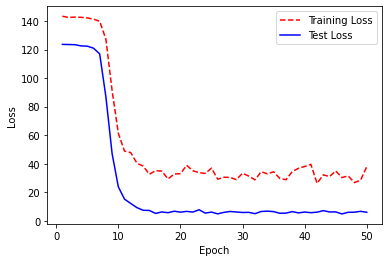

7/7 [==============================] - 0s 1ms/step


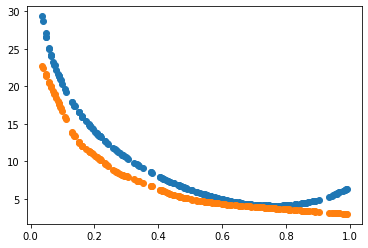

In [ ]:
#Train Model for Function 2
column=1
X_train=X_train_temp[:,column]
Y_train=Y_train_temp[:,column]
X_test=X_test_temp[:,column]
Y_test=Y_test_temp[:,column]


#F_2_archicture_4

start = timeit.default_timer()
history = model.fit(X_train,Y_train,epochs=number_epo,verbose=0,batch_size=10,validation_data=(X_test, Y_test)) 
end = timeit.default_timer()
print("Run Time : %f" % (end-start))
plot_(history)
plt.scatter(X_test, Y_test)
predict=model.predict(X_test)
plt.scatter(X_test, predict)

F_2_archicture_4=[X_test,Y_test,predict,history]


Run Time : 6.445696


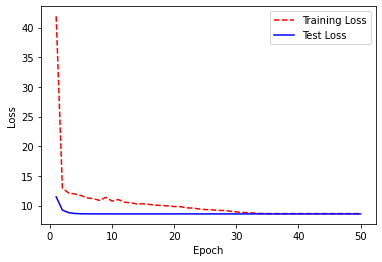

7/7 [==============================] - 0s 1ms/step


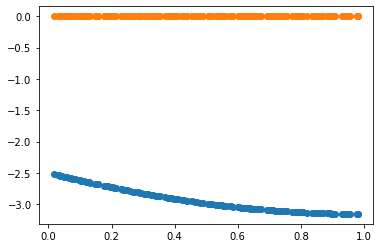

In [ ]:
#Train Model for Function 1
column=0
X_train=X_train_temp[:,column]
Y_train=Y_train_temp[:,column]
X_test=X_test_temp[:,column]
Y_test=Y_test_temp[:,column]


#F_1_archicture_4

start = timeit.default_timer()
history = model.fit(X_train,Y_train,epochs=number_epo,verbose=0,batch_size=10,validation_data=(X_test, Y_test)) 
end = timeit.default_timer()
print("Run Time : %f" % (end-start))
plot_(history)
plt.scatter(X_test, Y_test)
predict=model.predict(X_test)
plt.scatter(X_test, predict)

F_1_archicture_4=[X_test,Y_test,predict,history]


In [ ]:
#Fifth Traditional Model
model = Sequential()
model.add(Dense(5, input_dim=input_dim, activation='softplus'))
model.add(Dense(10, activation='softplus'))
model.add(Dense(20, activation='tanh'))
model.add(Dense(15, activation='relu'))
model.add(Dense(25, activation='tanh'))
model.add(Dense(20, activation='sigmoid'))
model.add(Dense(25, activation='relu'))
model.add(Dense(output_dim, activation='softplus'))
model.add(Dropout(0.2))
model.compile(loss='mean_squared_error', optimizer='adam')

Run Time : 8.171167


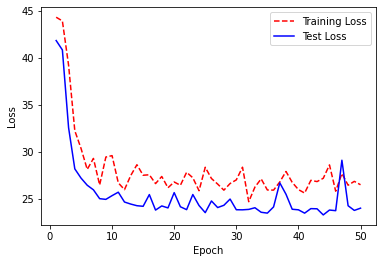

7/7 [==============================] - 0s 1ms/step


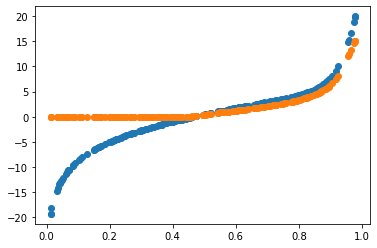

In [ ]:
#Train Model for Function 3
column=2
X_train=X_train_temp[:,column]
Y_train=Y_train_temp[:,column]
X_test=X_test_temp[:,column]
Y_test=Y_test_temp[:,column]


#F_3_archicture_5

start = timeit.default_timer()
history = model.fit(X_train,Y_train,epochs=number_epo,verbose=0,batch_size=10,validation_data=(X_test, Y_test)) 
end = timeit.default_timer()
print("Run Time : %f" % (end-start))
plot_(history)
plt.scatter(X_test, Y_test)
predict=model.predict(X_test)
plt.scatter(X_test, predict)


F_3_archicture_5=[X_test,Y_test,predict,history]


Run Time : 10.265039


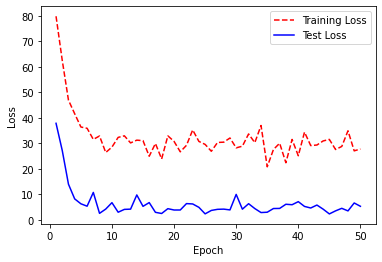

7/7 [==============================] - 0s 1ms/step


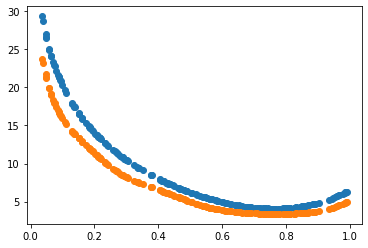

In [ ]:
#Train Model for Function 2
column=1
X_train=X_train_temp[:,column]
Y_train=Y_train_temp[:,column]
X_test=X_test_temp[:,column]
Y_test=Y_test_temp[:,column]


#F_2_archicture_5

start = timeit.default_timer()
history = model.fit(X_train,Y_train,epochs=number_epo,verbose=0,batch_size=10,validation_data=(X_test, Y_test)) 
end = timeit.default_timer()
print("Run Time : %f" % (end-start))
plot_(history)
plt.scatter(X_test, Y_test)
predict=model.predict(X_test)
plt.scatter(X_test, predict)

F_2_archicture_5=[X_test,Y_test,predict,history]


Run Time : 7.598047


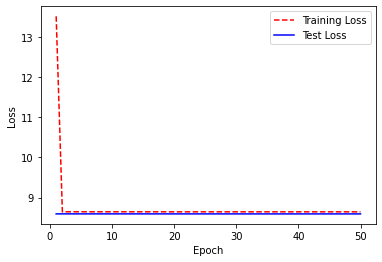

7/7 [==============================] - 0s 2ms/step


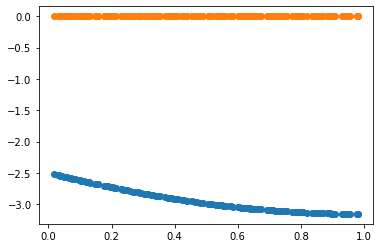

In [ ]:
#Train Model for Function 1
column=0
X_train=X_train_temp[:,column]
Y_train=Y_train_temp[:,column]
X_test=X_test_temp[:,column]
Y_test=Y_test_temp[:,column]


#F_1_archicture_5

start = timeit.default_timer()
history = model.fit(X_train,Y_train,epochs=number_epo,verbose=0,batch_size=10,validation_data=(X_test, Y_test)) 
end = timeit.default_timer()
print("Run Time : %f" % (end-start))
plot_(history)
plt.scatter(X_test, Y_test)
predict=model.predict(X_test)
plt.scatter(X_test, predict)

F_1_archicture_5=[X_test,Y_test,predict,history]


In [ ]:
#Number of neurons in each polynomial layer
hidden_dimention=50

In [ ]:
#Create SWAG Model with 4 Layers
model = Sequential()

in_ = Input(shape=(input_dim,))
Layer_1_Act_X_1=Dense(hidden_dimention, activation='X_1')(in_)
################################################################
Layer_1_Act_X_2=Dense(hidden_dimention, activation='X_2')(in_)
###############################################################
Layer_1_Act_X_3=Dense(hidden_dimention, activation='X_3')(in_)
###############################################################
Layer_1_Act_X_4=Dense(hidden_dimention, activation='X_4')(in_)
###############################################################
Layer_1_Act_X_5=Dense(hidden_dimention, activation='X_5')(in_)
###############################################################
Layer_1_Act_X_6=Dense(hidden_dimention, activation='X_6')(in_)
###############################################################
Layer_1_Act_X_7=Dense(hidden_dimention, activation='X_7')(in_)
###############################################################
Layer_1_Act_X_8=Dense(hidden_dimention, activation='X_8')(in_)
###############################################################
Concatenate_First_Layer = concatenate([Layer_1_Act_X_1,Layer_1_Act_X_2,Layer_1_Act_X_3,Layer_1_Act_X_4,Layer_1_Act_X_5,Layer_1_Act_X_6,Layer_1_Act_X_7,Layer_1_Act_X_8])

Out_put_first_layer=Dense(hidden_dimention, activation='linear')(Concatenate_First_Layer)

###############################################################
Layer_2_Act_X_1=Dense(hidden_dimention, activation='X_1')(Out_put_first_layer)
################################################################
Layer_2_Act_X_2=Dense(hidden_dimention, activation='X_2')(Out_put_first_layer)
###############################################################
Layer_2_Act_X_3=Dense(hidden_dimention, activation='X_3')(Out_put_first_layer)
###############################################################
Layer_2_Act_X_4=Dense(hidden_dimention, activation='X_4')(Out_put_first_layer)
###############################################################
Layer_2_Act_X_5=Dense(hidden_dimention, activation='X_5')(Out_put_first_layer)
###############################################################
Layer_2_Act_X_6=Dense(hidden_dimention, activation='X_6')(Out_put_first_layer)
###############################################################
Layer_2_Act_X_7=Dense(hidden_dimention, activation='X_7')(Out_put_first_layer)
###############################################################
Layer_2_Act_X_8=Dense(hidden_dimention, activation='X_8')(Out_put_first_layer)
###############################################################


Concatenate_second_Layer = concatenate([Layer_2_Act_X_1,Layer_2_Act_X_2,Layer_2_Act_X_3,Layer_2_Act_X_4,Layer_2_Act_X_5,Layer_2_Act_X_6,Layer_2_Act_X_7,Layer_2_Act_X_8])

Out_put=Dense(output_dim, activation='linear')(Concatenate_second_Layer)
model = Model(in_ , Out_put)
model.summary()
model.compile(loss='mean_squared_error', optimizer='adam')





Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 1)]          0           []                               
                                                                                                  
 dense_70 (Dense)               (None, 50)           100         ['input_2[0][0]']                
                                                                                                  
 dense_71 (Dense)               (None, 50)           100         ['input_2[0][0]']                
                                                                                                  
 dense_72 (Dense)               (None, 50)           100         ['input_2[0][0]']                
                                                                                              

In [ ]:
# from IPython.display import Image
# Image(filename='model_4_layers.png')

Run Time : 21.800996


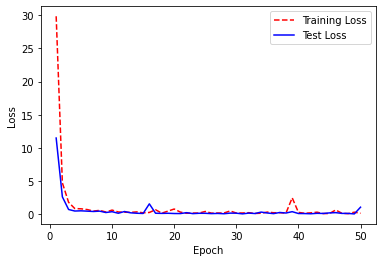

7/7 [==============================] - 0s 2ms/step


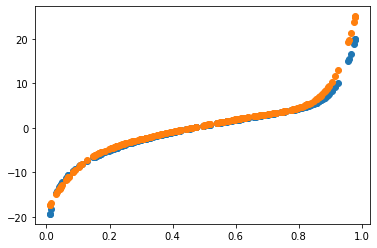

In [ ]:
#Train Our Model on Function 3
column=2
X_train=X_train_temp[:,column]
Y_train=Y_train_temp[:,column]
X_test=X_test_temp[:,column]
Y_test=Y_test_temp[:,column]


#F_3_archicture_Our

start = timeit.default_timer()
history = model.fit(X_train,Y_train,epochs=number_epo,verbose=0,batch_size=10,validation_data=(X_test, Y_test)) 
end = timeit.default_timer()
print("Run Time : %f" % (end-start))
plot_(history)
plt.scatter(X_test, Y_test)
predict=model.predict(X_test)
plt.scatter(X_test, predict)

F_3_our_model=[X_test,Y_test,predict,history]



Run Time : 12.387929


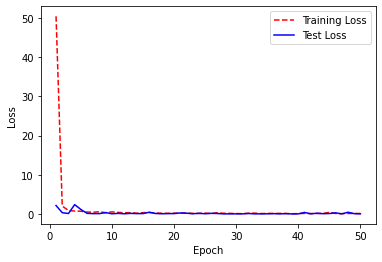

7/7 [==============================] - 0s 2ms/step


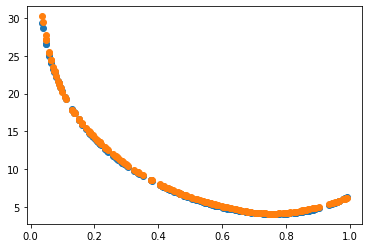

In [ ]:
#Train Our Model on Function 2
column=1
X_train=X_train_temp[:,column]
Y_train=Y_train_temp[:,column]
X_test=X_test_temp[:,column]
Y_test=Y_test_temp[:,column]


#F_2_archicture_Our

start = timeit.default_timer()
history = model.fit(X_train,Y_train,epochs=number_epo,verbose=0,batch_size=10,validation_data=(X_test, Y_test)) 
end = timeit.default_timer()
print("Run Time : %f" % (end-start))
plot_(history)
plt.scatter(X_test, Y_test)
predict=model.predict(X_test)
plt.scatter(X_test, predict)

F_2_our_model=[X_test,Y_test,predict,history]

Run Time : 20.500578


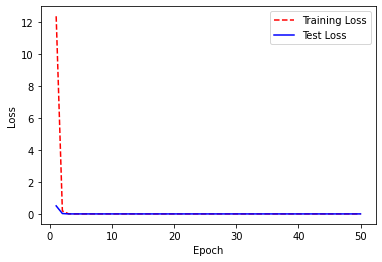

7/7 [==============================] - 0s 2ms/step


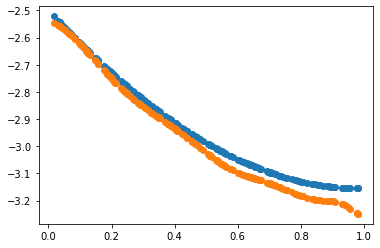

In [ ]:
#Train Our Model on Function 1
column=0
X_train=X_train_temp[:,column]
Y_train=Y_train_temp[:,column]
X_test=X_test_temp[:,column]
Y_test=Y_test_temp[:,column]


#F_2_archicture_our

start = timeit.default_timer()
history = model.fit(X_train,Y_train,epochs=number_epo,verbose=0,batch_size=10,validation_data=(X_test, Y_test)) 
end = timeit.default_timer()
print("Run Time : %f" % (end-start))
plot_(history)
plt.scatter(X_test, Y_test)
predict=model.predict(X_test)
plt.scatter(X_test, predict)

F_1_our_model=[X_test,Y_test,predict,history]

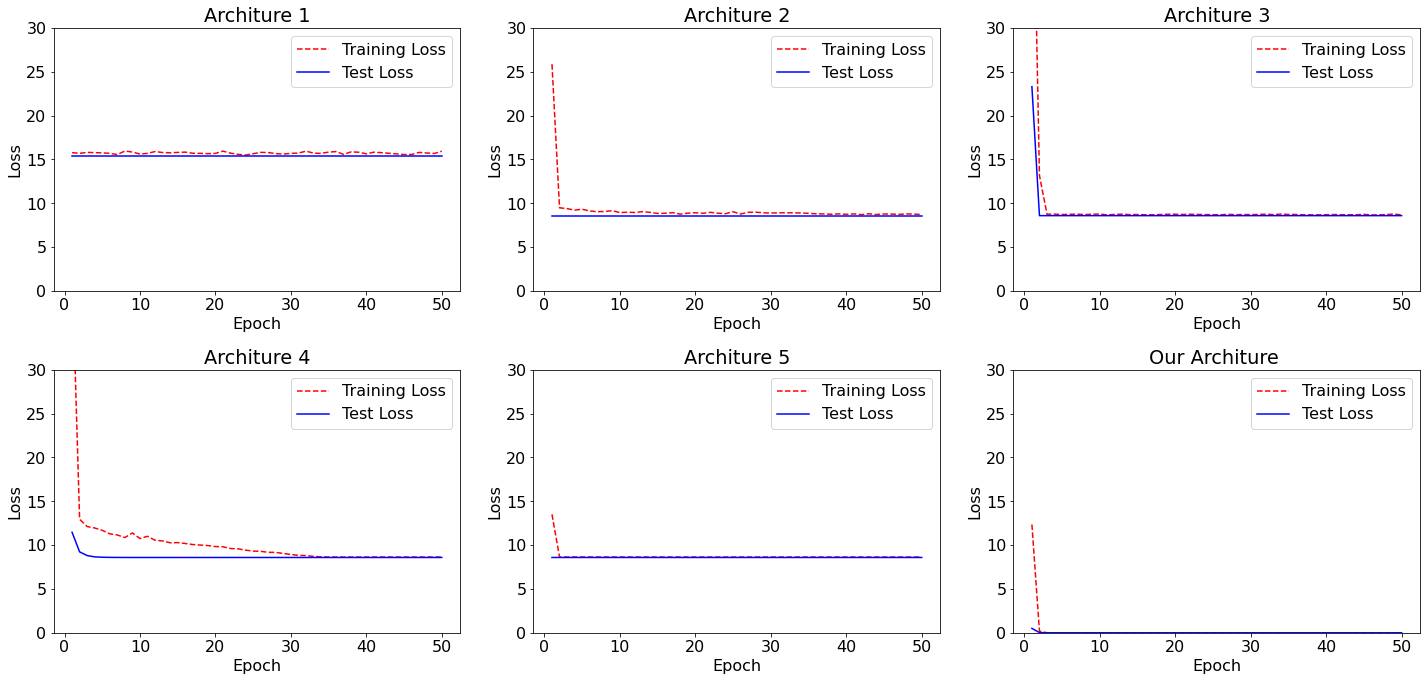

In [ ]:
#Plots Losses
plot_loss(30,F_1_archicture_1[3],F_1_archicture_2[3],F_1_archicture_3[3],F_1_archicture_4[3],F_1_archicture_5[3],F_1_our_model[3],)

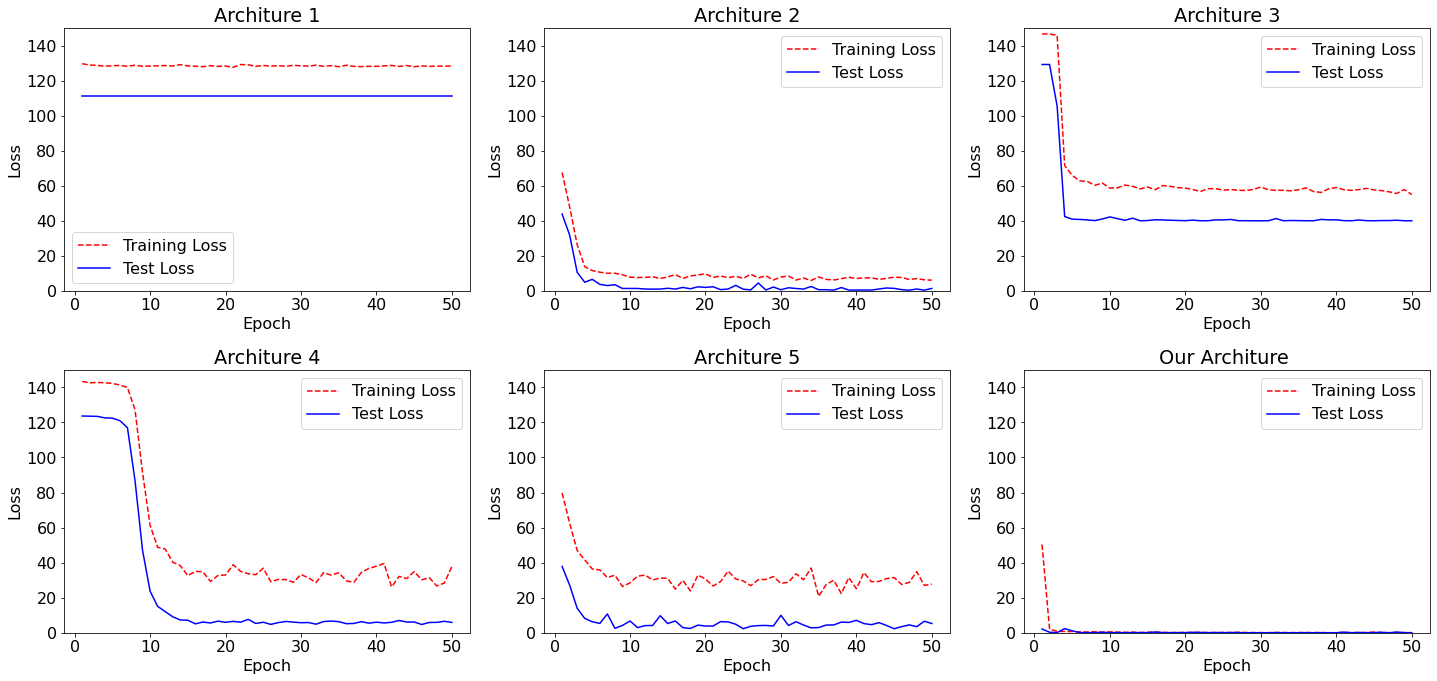

In [ ]:
#Plot Losses
plot_loss(150,F_2_archicture_1[3],F_2_archicture_2[3],F_2_archicture_3[3],F_2_archicture_4[3],F_2_archicture_5[3],F_2_our_model[3],)

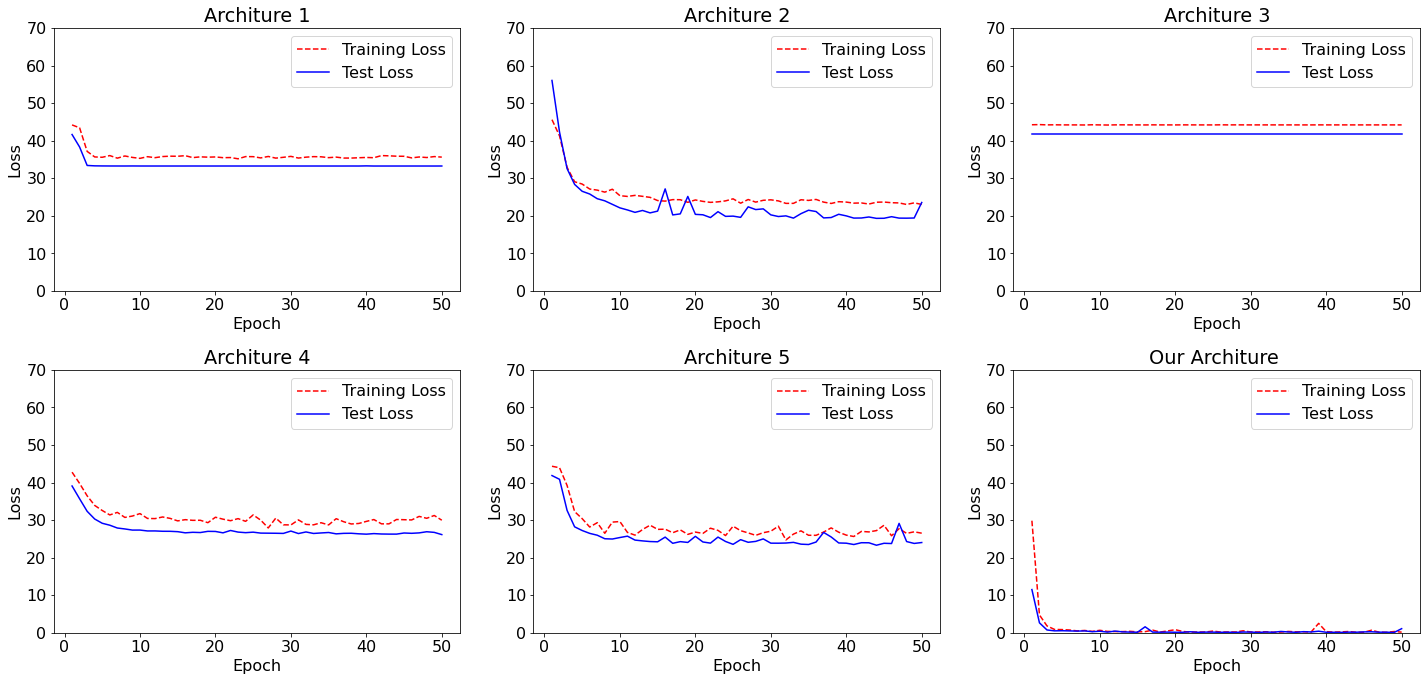

In [ ]:
#Plot Losses
plot_loss(70,F_3_archicture_1[3],F_3_archicture_2[3],F_3_archicture_3[3],F_3_archicture_4[3],F_3_archicture_5[3],F_3_our_model[3],)

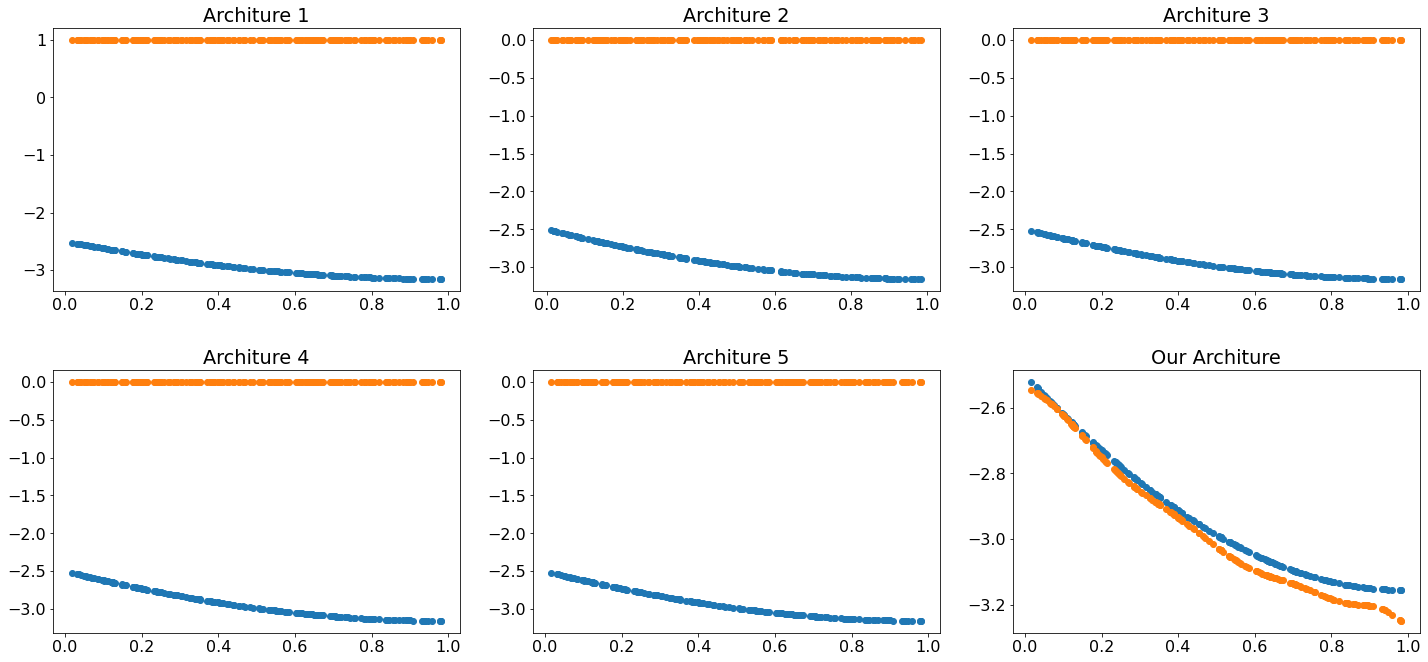

In [ ]:
#Plots Shapes
plot_shape(F_1_archicture_1,F_1_archicture_2,F_1_archicture_3,F_1_archicture_4,F_1_archicture_5,F_1_our_model,)


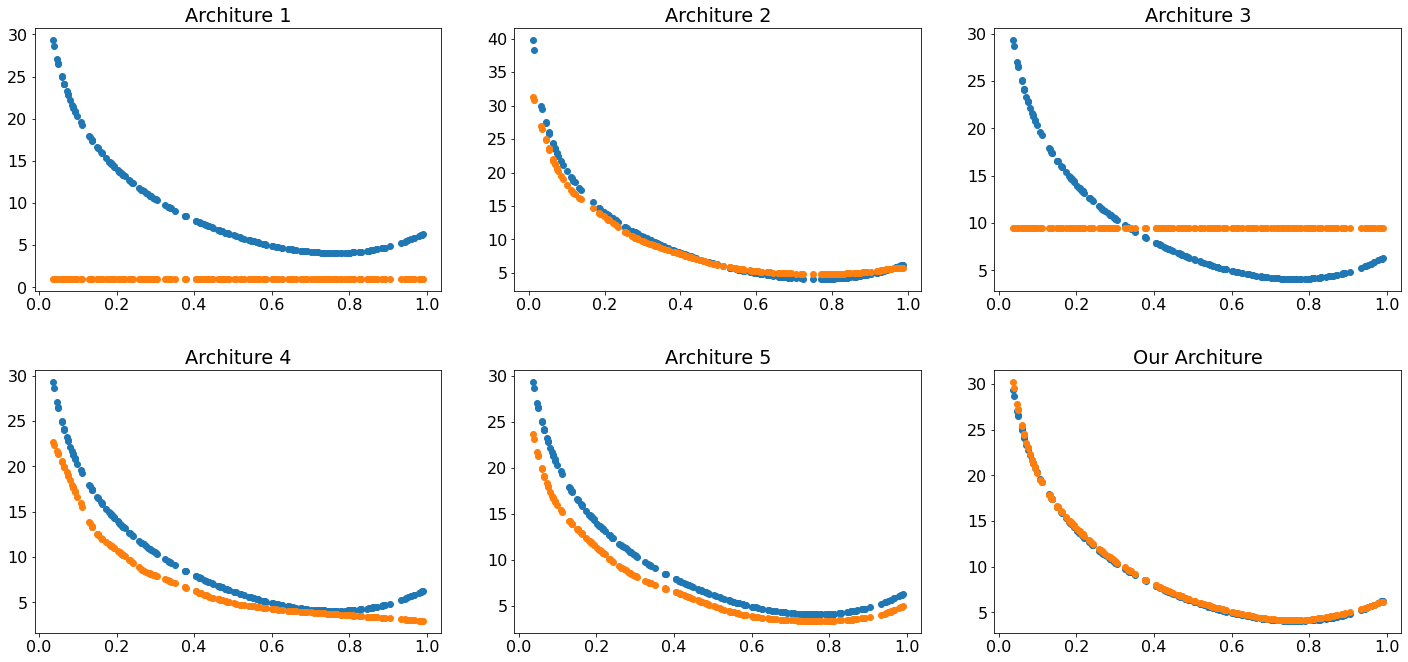

In [ ]:
#Plots Shapes 
plot_shape(F_2_archicture_1,F_2_archicture_2,F_2_archicture_3,F_2_archicture_4,F_2_archicture_5,F_2_our_model,)

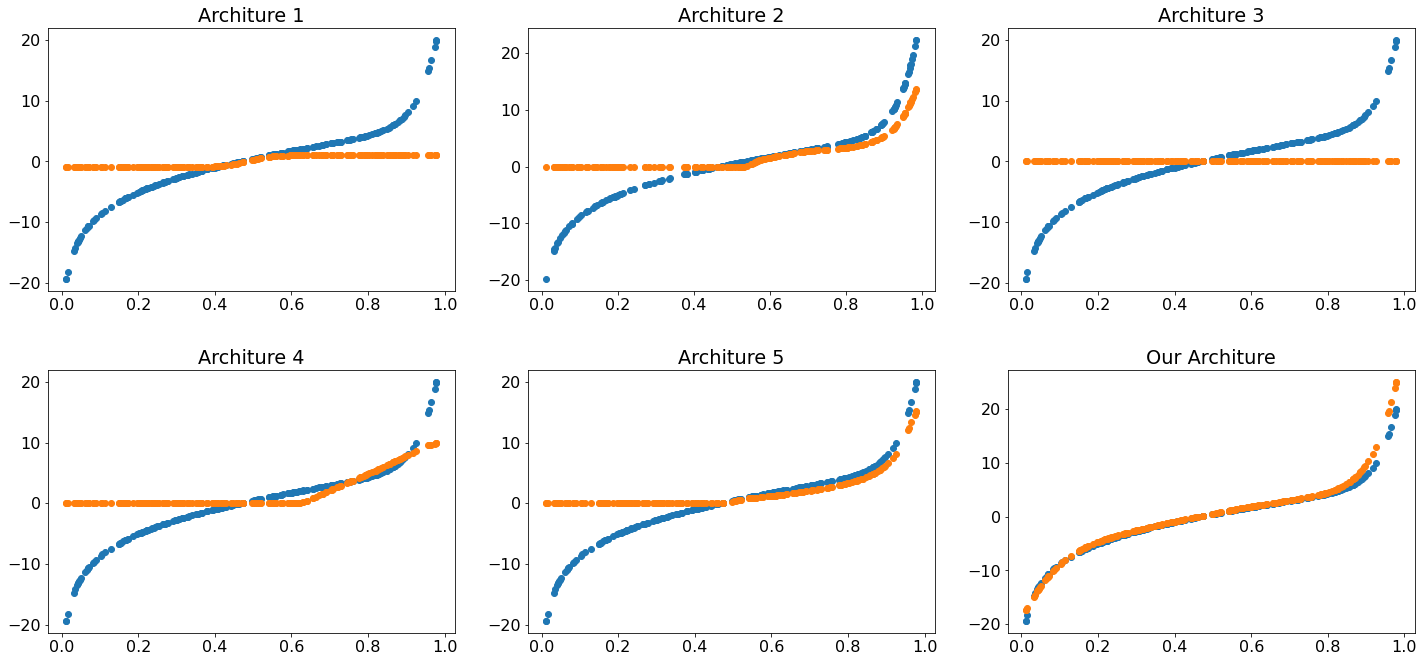

In [ ]:
#Plots Shapes
plot_shape(F_3_archicture_1,F_3_archicture_2,F_3_archicture_3,F_3_archicture_4,F_3_archicture_5,F_3_our_model)

In [ ]:
#Our Model With 2 Layers
model = Sequential()



in_ = Input(shape=(input_dim,))
Layer_1_Act_X_1=Dense(hidden_dimention, activation='X_1')(in_)
################################################################
Layer_1_Act_X_2=Dense(hidden_dimention, activation='X_2')(in_)
###############################################################
Layer_1_Act_X_3=Dense(hidden_dimention, activation='X_3')(in_)
###############################################################
Layer_1_Act_X_4=Dense(hidden_dimention, activation='X_4')(in_)
###############################################################
Layer_1_Act_X_5=Dense(hidden_dimention, activation='X_5')(in_)
###############################################################
Layer_1_Act_X_6=Dense(hidden_dimention, activation='X_6')(in_)
###############################################################
Layer_1_Act_X_7=Dense(hidden_dimention, activation='X_7')(in_)
###############################################################
Layer_1_Act_X_8=Dense(hidden_dimention, activation='X_8')(in_)
###############################################################
Concatenate_First_Layer = concatenate([Layer_1_Act_X_1,Layer_1_Act_X_2,Layer_1_Act_X_3,Layer_1_Act_X_4,Layer_1_Act_X_5,Layer_1_Act_X_6,Layer_1_Act_X_7,Layer_1_Act_X_8])

Out_put_first_layer=Dense(hidden_dimention, activation='linear')(Concatenate_First_Layer)


Out_put=Dense(output_dim, activation='linear')(Out_put_first_layer)
model = Model(in_ , Out_put)
model.summary()
model.compile(loss='mean_squared_error', optimizer='adam')



Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 1)]          0           []                               
                                                                                                  
 dense_88 (Dense)               (None, 50)           100         ['input_3[0][0]']                
                                                                                                  
 dense_89 (Dense)               (None, 50)           100         ['input_3[0][0]']                
                                                                                                  
 dense_90 (Dense)               (None, 50)           100         ['input_3[0][0]']                
                                                                                            

In [ ]:
# from IPython.display import Image
# Image(filename='model_2_layers.png')

Run Time : 9.388202


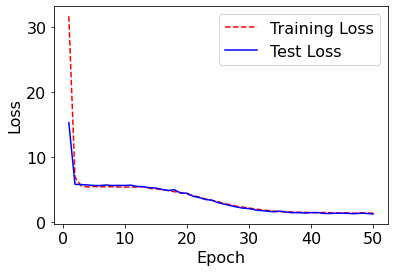

7/7 [==============================] - 0s 2ms/step


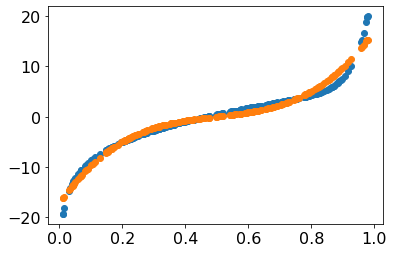

In [ ]:
#Train Our Model on Function 3
column=2
X_train=X_train_temp[:,column]
Y_train=Y_train_temp[:,column]
X_test=X_test_temp[:,column]
Y_test=Y_test_temp[:,column]


#F_3_archicture_our

start = timeit.default_timer()
history = model.fit(X_train,Y_train,epochs=number_epo,verbose=0,batch_size=10,validation_data=(X_test, Y_test)) 
end = timeit.default_timer()
print("Run Time : %f" % (end-start))
plot_(history)
plt.scatter(X_test, Y_test)
predict=model.predict(X_test)
plt.scatter(X_test, predict)

F_3_our_model=[X_test,Y_test,predict,history]



Run Time : 9.272610


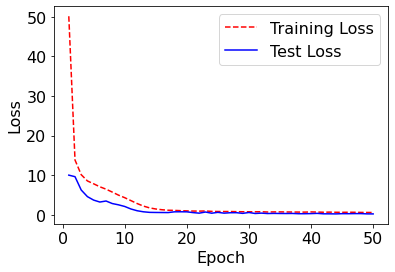

7/7 [==============================] - 0s 2ms/step


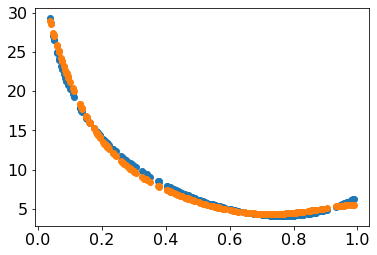

In [ ]:
#Train Our Model on Function 2
column=1
X_train=X_train_temp[:,column]
Y_train=Y_train_temp[:,column]
X_test=X_test_temp[:,column]
Y_test=Y_test_temp[:,column]


#F_2_archicture_our

start = timeit.default_timer()
history = model.fit(X_train,Y_train,epochs=number_epo,verbose=0,batch_size=10,validation_data=(X_test, Y_test)) 
end = timeit.default_timer()
print("Run Time : %f" % (end-start))
plot_(history)
plt.scatter(X_test, Y_test)
predict=model.predict(X_test)
plt.scatter(X_test, predict)

F_2_our_model=[X_test,Y_test,predict,history]

Run Time : 10.255906


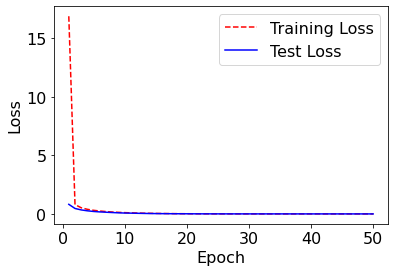

7/7 [==============================] - 0s 2ms/step


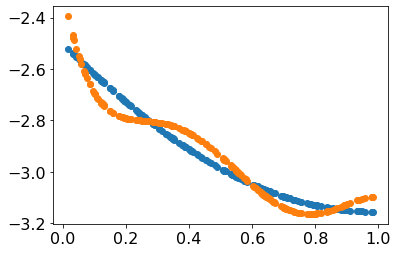

In [ ]:
#Train Our Model on Function 1
column=0
X_train=X_train_temp[:,column]
Y_train=Y_train_temp[:,column]
X_test=X_test_temp[:,column]
Y_test=Y_test_temp[:,column]


#F_1_archicture_our

start = timeit.default_timer()
history = model.fit(X_train,Y_train,epochs=number_epo,verbose=0,batch_size=10,validation_data=(X_test, Y_test)) 
end = timeit.default_timer()
print("Run Time : %f" % (end-start))
plot_(history)
plt.scatter(X_test, Y_test)
predict=model.predict(X_test)
plt.scatter(X_test, predict)

F_1_our_model=[X_test,Y_test,predict,history]

In [ ]:
#Create SWAG Model with 4 Layers
model = Sequential()

in_ = Input(shape=(input_dim,))
Layer_1_Act_X_1=Dense(hidden_dimention, activation='X_1')(in_)
################################################################
Layer_1_Act_X_2=Dense(hidden_dimention, activation='X_2')(in_)
###############################################################
Layer_1_Act_X_3=Dense(hidden_dimention, activation='X_3')(in_)
###############################################################
Layer_1_Act_X_4=Dense(hidden_dimention, activation='X_4')(in_)
###############################################################
Layer_1_Act_X_5=Dense(hidden_dimention, activation='X_5')(in_)
###############################################################
Layer_1_Act_X_6=Dense(hidden_dimention, activation='X_6')(in_)
###############################################################
Layer_1_Act_X_7=Dense(hidden_dimention, activation='X_7')(in_)
###############################################################
Layer_1_Act_X_8=Dense(hidden_dimention, activation='X_8')(in_)
###############################################################
Concatenate_First_Layer = concatenate([Layer_1_Act_X_1,Layer_1_Act_X_2,Layer_1_Act_X_3,Layer_1_Act_X_4,Layer_1_Act_X_5,Layer_1_Act_X_6,Layer_1_Act_X_7,Layer_1_Act_X_8])

Out_put_first_layer=Dense(hidden_dimention, activation='linear')(Concatenate_First_Layer)

###############################################################
Layer_2_Act_X_1=Dense(hidden_dimention, activation='X_1')(Out_put_first_layer)
################################################################
Layer_2_Act_X_2=Dense(hidden_dimention, activation='X_2')(Out_put_first_layer)
###############################################################
Layer_2_Act_X_3=Dense(hidden_dimention, activation='X_3')(Out_put_first_layer)
###############################################################
Layer_2_Act_X_4=Dense(hidden_dimention, activation='X_4')(Out_put_first_layer)
###############################################################
Layer_2_Act_X_5=Dense(hidden_dimention, activation='X_5')(Out_put_first_layer)
###############################################################
Layer_2_Act_X_6=Dense(hidden_dimention, activation='X_6')(Out_put_first_layer)
###############################################################
Layer_2_Act_X_7=Dense(hidden_dimention, activation='X_7')(Out_put_first_layer)
###############################################################
Layer_2_Act_X_8=Dense(hidden_dimention, activation='X_8')(Out_put_first_layer)
###############################################################


Concatenate_second_Layer = concatenate([Layer_2_Act_X_1,Layer_2_Act_X_2,Layer_2_Act_X_3,Layer_2_Act_X_4,Layer_2_Act_X_5,Layer_2_Act_X_6,Layer_2_Act_X_7,Layer_2_Act_X_8])

Out_put=Dense(output_dim, activation='linear')(Concatenate_second_Layer)
model = Model(in_ , Out_put)
model.summary()
model.compile(loss='mean_squared_error', optimizer='adam')





Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 1)]          0           []                               
                                                                                                  
 dense_98 (Dense)               (None, 50)           100         ['input_4[0][0]']                
                                                                                                  
 dense_99 (Dense)               (None, 50)           100         ['input_4[0][0]']                
                                                                                                  
 dense_100 (Dense)              (None, 50)           100         ['input_4[0][0]']                
                                                                                            

In [ ]:
###############################################################################
def fun_3(co,x):
    return co[0]*power_(x, co[1])+co[2]*sigmoid_array(co[3]*x)+co[4]*exp_(co[5]*x*0.1)+co[6]*log_(co[7]*x)
###############################################################################

In [ ]:
import random
def rand_list():
  coefficient= [None for _ in range(8)]
  coefficient[0]= random.randint(-10, 10)
  coefficient[2]= random.randint(-10, 10)
  coefficient[4]= random.randint(-10, 10)
  coefficient[6]= random.randint(-10, 10)
  coefficient[1]= random.randint(1,50)
  coefficient[3]= random.randint(1,50)
  coefficient[5]= random.randint(1,50)
  coefficient[7]= random.randint(1,50)
  return coefficient


In [ ]:

# Y_test_temp[:,2]=fun_3(coefficient,X_test_temp[:,2])
# Y_train_temp[:,2]=fun_3(coefficient,X_train_temp[:,2])

Y_test_temp[:,2]=fun_2(X_test_temp[:,2])
Y_train_temp[:,2]=fun_2(X_train_temp[:,2])


In [ ]:
Y_train_temp[:,0]=fun_1(X_train_temp[:,0])
Y_train_temp[:,1]=fun_2(X_train_temp[:,1])
# Y_train_temp[:,2]=fun_3(X_train_temp[:,2])
    

Y_test_temp[:,0]=fun_1(X_test_temp[:,0])
Y_test_temp[:,1]=fun_2(X_test_temp[:,1])
# Y_test_temp[:,2]=fun_3(X_test_temp[:,2])

Epoch 1/20
100/100 [==============================] - 2s 5ms/step - loss: 10174.0830 - val_loss: 633.8245
Epoch 2/20
100/100 [==============================] - 0s 3ms/step - loss: 213.1001 - val_loss: 12.9632
Epoch 3/20
100/100 [==============================] - 0s 3ms/step - loss: 9.2849 - val_loss: 3.2420
Epoch 4/20
100/100 [==============================] - 0s 3ms/step - loss: 5.3163 - val_loss: 3.4979
Epoch 5/20
100/100 [==============================] - 0s 3ms/step - loss: 2.1533 - val_loss: 1.9904
Epoch 6/20
100/100 [==============================] - 0s 3ms/step - loss: 1.2900 - val_loss: 2.2347
Epoch 7/20
100/100 [==============================] - 0s 3ms/step - loss: 2.1616 - val_loss: 1.2867
Epoch 8/20
100/100 [==============================] - 0s 4ms/step - loss: 32.2231 - val_loss: 19.3752
Epoch 9/20
100/100 [==============================] - 0s 3ms/step - loss: 205.3541 - val_loss: 189.4679
Epoch 10/20
100/100 [==============================] - 0s 3ms/step - loss: 22.6600 - 

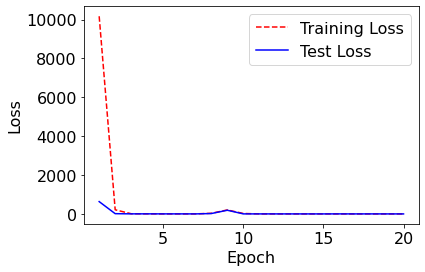

7/7 [==============================] - 0s 2ms/step


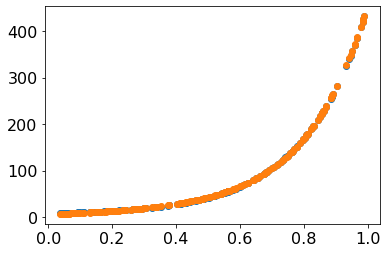

In [ ]:
column=1
coefficient=rand_list()
Y_test_temp[:,1]=fun_3(coefficient,X_test_temp[:,1])
Y_train_temp[:,1]=fun_3(coefficient,X_train_temp[:,1])

X_train=X_train_temp[:,column]
Y_train=Y_train_temp[:,column]
X_test=X_test_temp[:,column]
Y_test=Y_test_temp[:,column]


#F_3_archicture_our

start = timeit.default_timer()
history = model.fit(X_train,Y_train,epochs=20,verbose=1,batch_size=10,validation_data=(X_test, Y_test)) 
end = timeit.default_timer()
print("Run Time : %f" % (end-start))
plot_(history)
plt.scatter(X_test, Y_test)
predict=model.predict(X_test)
plt.scatter(X_test, predict)

# F_3_our_model=[X_test,Y_test,predict,history]

In [ ]:
print(history.history['val_loss'])


[633.8245239257812, 12.963165283203125, 3.2420461177825928, 3.4978699684143066, 1.9903773069381714, 2.2347164154052734, 1.2867426872253418, 19.37523651123047, 189.46792602539062, 2.0588457584381104, 1.2054522037506104, 0.8944225311279297, 0.7883210778236389, 0.6059305667877197, 0.5295689105987549, 1.6767393350601196, 0.5081931352615356, 1.3253108263015747, 0.4789949357509613, 0.4301654100418091]


In [ ]:
print(coefficient)

[6, 30, 5, 45, 3, 50, 0, 7]


Epoch 1/20
100/100 [==============================] - 0s 4ms/step - loss: 448.4309 - val_loss: 4.9080
Epoch 2/20
100/100 [==============================] - 0s 3ms/step - loss: 8.1006 - val_loss: 4.4290
Epoch 3/20
100/100 [==============================] - 0s 3ms/step - loss: 7.8926 - val_loss: 4.4352
Epoch 4/20
100/100 [==============================] - 0s 3ms/step - loss: 7.6686 - val_loss: 4.1447
Epoch 5/20
100/100 [==============================] - 0s 3ms/step - loss: 7.1972 - val_loss: 3.9462
Epoch 6/20
100/100 [==============================] - 0s 3ms/step - loss: 6.4081 - val_loss: 3.1966
Epoch 7/20
100/100 [==============================] - 0s 3ms/step - loss: 5.3545 - val_loss: 2.7541
Epoch 8/20
100/100 [==============================] - 0s 3ms/step - loss: 4.2727 - val_loss: 2.4863
Epoch 9/20
100/100 [==============================] - 0s 3ms/step - loss: 3.5785 - val_loss: 2.2131
Epoch 10/20
100/100 [==============================] - 0s 3ms/step - loss: 3.0721 - val_loss: 2.06

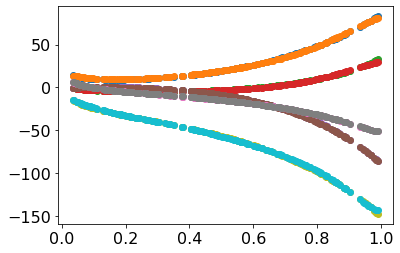

In [ ]:
for i in range(5):  
  column=1
  coefficient=rand_list()
  Y_test_temp[:,1]=fun_3(coefficient,X_test_temp[:,1])
  Y_train_temp[:,1]=fun_3(coefficient,X_train_temp[:,1])

  X_train=X_train_temp[:,column]
  Y_train=Y_train_temp[:,column]
  X_test=X_test_temp[:,column]
  Y_test=Y_test_temp[:,column]


  #F_3_archicture_our

  start = timeit.default_timer()
  history = model.fit(X_train,Y_train,epochs=20,verbose=1,batch_size=10,validation_data=(X_test, Y_test)) 
  end = timeit.default_timer()
  print("Run Time : %f" % (end-start))
  # plot_(history)
  plt.scatter(X_test, Y_test)
  predict=model.predict(X_test)
  plt.scatter(X_test, predict)

  # F_3_our_model=[X_test,Y_test,predict,history]